<a href="https://colab.research.google.com/github/aminabyaneh/Distributed_Systems/blob/master/Spark_Distributed_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Distributed Algorithms in Spark
**Amin Mohammad Soleimani Abyaneh 94100805**

Here we implement three different algorithms on Spark platform.


1.   Distributed Recommendation System
2.   Distributed Page Ranking System



## 0. Installation
Step by step installation for Apache Spark. In this section we install all we need to start our programs with Apache Spark.

### a. Java

In [0]:
!java -version

openjdk version "1.8.0_212"
OpenJDK Runtime Environment (build 1.8.0_212-8u212-b03-0ubuntu1.18.04.1-b03)
OpenJDK 64-Bit Server VM (build 25.212-b03, mixed mode)


In [0]:
!sudo apt install openjdk-8-jdk

!sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jdk is already the newest version (8u212-b03-0ubuntu1.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
There are 2 choices for the alternative java (providing /usr/bin/java).

  Selection    Path                                            Priority   Status
------------------------------------------------------------
  0            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      manual mode
* 2            /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java   1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: 2


### b.  Scala

In [0]:
!sudo apt install scala

Reading package lists... Done
Building dependency tree       
Reading state information... Done
scala is already the newest version (2.11.12-4~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [0]:
!scala -version


Scala code runner version 2.11.12 -- Copyright 2002-2017, LAMP/EPFL


### c. Spark 

In [0]:
!wget "https://www-us.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz"

--2019-06-21 07:07:25--  https://www-us.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz
Resolving www-us.apache.org (www-us.apache.org)... 40.79.78.1
Connecting to www-us.apache.org (www-us.apache.org)|40.79.78.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229988313 (219M) [application/x-gzip]
Saving to: ‘spark-2.4.3-bin-hadoop2.7.tgz.2’

spark-2.4.3-bin-had 100%[===================>] 219.33M  35.9MB/s    in 6.5s    

2019-06-21 07:07:32 (33.5 MB/s) - ‘spark-2.4.3-bin-hadoop2.7.tgz.2’ saved [229988313/229988313]



In [0]:
!pwd

/content


In [0]:
!tar xvf spark-2.4.3-bin-hadoop2.7.tgz

In [0]:
!pip3 install pyspark

## 1. Distributed Recommendation System
Spark is deployed on the top of Hadoop Distributed File System (HDFS). For computations, Spark and MapReduce run in parallel for the Spark jobs submitted to the cluster.
Apache Spark runs on  Mesos or YARN (Yet another Resource Navigator, one of the key features in the second-generation Hadoop) without any root-access or pre-installation. It integrates Spark on top Hadoop stack that is already present on the system.

In this section, a recommender system must be implemented. In order to do that, first we need to setup the environment and later, use Map/Reduce structures to manipulate the data. Original data comes from a file which is given in piazza. There are two main parts for the first section: Getting Started and Algorithm Implementation. We dive through each of the sections respectively.

### a. Getting Started
Before we implement the algorithm there are several steps to be done. First of all we must check the JRE. Availability of JRE is vital for any spark program.

In [0]:
!java -version

openjdk version "11.0.3" 2019-04-16
OpenJDK Runtime Environment (build 11.0.3+7-Ubuntu-1ubuntu218.04.1)
OpenJDK 64-Bit Server VM (build 11.0.3+7-Ubuntu-1ubuntu218.04.1, mixed mode, sharing)


Next, We check the availability of pyspark. It is the main module which we are going to use in our program.

In [0]:
!pyspark

Then we have to import necessary modules for our program.


*   Sys
*   SparkConf
*   SparkContext



In [0]:
# imports for program
import sys
import itertools
from pyspark import SparkConf, SparkContext

Spark properties control most application parameters and can be set by using a SparkConf object, or through Java system properties. Environment variables can be used to set per-machine settings, such as the IP address, through the conf/spark-env.sh script on each node.

In [0]:
# initialize spark configuration
conf = SparkConf()

**Spark Context** was the entry point of any spark application and used to access all spark features and needed a sparkConf which had all the cluster configs and parameters to create a Spark Context object. We could primarily create just RDDs using Spark Context and we had to create specific spark contexts for any other spark interactions. For SQL SQLContext, hive HiveContext, streaming Streaming Application. In a nutshell, Spark session is a combination of all these different contexts. Internally, Spark session creates a new SparkContext for all the operations and also all the above-mentioned contexts can be accessed using the SparkSession object.

**Why do I need Spark session when I already have Spark context?**

A part of the answer would be that it unifies all the different contexts in spark and avoids the developer to worry about creating difference contexts. But apart from this big advantage, the developers of spark have tried to solve the problem when there are multiple users using the same spark context.
Let’s say we have multiple users accessing the same notebook environment which had shared spark context and the requirement was to have an isolated environment sharing the same spark context. Prior to 2.0, the solution to this was to create multiple spark contexts ie spark context per isolated environment or users and is an expensive operation(generally 1 per JVM). But with the introduction of the spark session, this issue has been addressed.

The next step is to create a Spark context object with the desired spark configuration that tells Apache Spark on how to access a cluster. The below line of code in the word count example does this -



```
val sc = new SparkContext( "local", "Word Count", "/usr/local/spark", Nil, Map(), Map())
```


“Word Count” – This is the name of the application that you want to run.

“local”- This parameter denotes the master URL to connect the spark application to.

 /usr/local/spark- This parameter denotes the home directory of Apache Spark.

Map() – The first map  specifies the  environment whilst the second one specifies the variables to work nodes.

In [0]:
# initialize spark context
sc = SparkContext(conf=conf)

The next step in the Spark Word count example creates an input Spark RDD that reads the text file input.txt using the Spark Context created in the previous step-

`val input = sc.textFile("input.txt")  `                 



In [0]:
# read from text file
lines = sc.textFile("data.txt")

Check the type of sc. sc should be a RDD as it is the result of parsing text using textFile function.

In [0]:
# check the lines data
type(lines)

pyspark.rdd.RDD

We filter the file for any data not having tab for seperating the information from labels. **filter** returns the rows of a DataFrame that matches the given condition. Parameters are DataFrame: Any SparkR DataFrame,  condition: Condition to filter on. This may either be a Column expression or a string containing a SQL statement


In [0]:
# filter irregular lines
filtered_lines = lines.filter(lambda x: ("\t" in x) and (not x))

### b. Algorithm Implementation
Now we start implementing the algorithm. The strategy I propose is based on the fact that the basic data line:

1   2,4,11,12,15

Can be thought of as a list of "friendship suggestions", meaning this line tells me : "2 should be friends with 4, 11, 12, 15", "4 should be friends with 2, 11, 12, 15", and so on.

Therefore, the gist of my implementation is

1. Turn each line into a list of suggestions
2. Group suggestions by person with duplicates
3. Count the number of duplicates
4. Remove existing relationships
5. Filter suggestions that occur too rarely
6. print results into a file

First we need to use map function whith a suitable callable function to create a structure of our data. This parses a line from the data text file into a structure. For example, the line: "0    1,2,3,4" parsed to: (0, [1, 2, 3, 4])

In [0]:
def line_to_structure(line):
    """
    Parses a line from the data text file into a structure.
    For example, the line: "0    1,2,3,4" parsed to: (0, [1, 2, 3, 4])
    """
    split = line.split()
    user_id = int(split[0])

    if len(split) == 1:
        friends = []
    else:
        friends = list(map(lambda x: int(x), split[1].split(',')))

    return user_id, friends

Spark map is a function which expresses a one-to-one transformation. It transforms each element of a collection into one element of the resulting collection. Spark flatMap is a function which expresses a one-to-many transformation. It transforms each element to 0 or more elements.

In [0]:
# Map each line to the form: (user_id, [friend_id_0, friend_id_1, ...])
structure = lines.map(line_to_structure)

In [0]:
# check the structure
print(type(structure))
print(structure.take(1)[0])

<class 'pyspark.rdd.PipelinedRDD'>
(0, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94])


Next we have to manipulate the structures to connection data. Connections are a key value objects that the first parameter is a pair of id and the second parameter indicates whether these two parameters have a mutual friend or not.

For example, the value `(0, [1, 2, 3])` will get mapped to:

        [
            ((0,1), 0),
            ((0,2), 0),
            ((0,3), 0),
            ((1,2), 1),
            ((1,3), 1),
            ((2,3), 1)
        ]

In [0]:
def structure_to_connection(structure):
    """
    Maps a structure to an array of connections.
    For example, the value (0, [1, 2, 3]) will get mapped to:
        [
            ((0,1), 0),
            ((0,2), 0),
            ((0,3), 0),
            ((1,2), 1),
            ((1,3), 1),
            ((2,3), 1)
        ]

    """
    user_id = structure[0]
    friends = structure[1]

    connections = []

    for friend_id in friends:
        key = (user_id, friend_id)
        if user_id > friend_id:
            key = (friend_id, user_id)

        connections.append(
            (key, 0)
        )

    for friend_pair in itertools.combinations(friends, 2):
        friend_0 = friend_pair[0]
        friend_1 = friend_pair[1]

        key = (friend_0, friend_1)
        if friend_0 > friend_1:
            key = (friend_1, friend_0)
        connections.append(
            (key, 1)
        )

    return connections

A flatMap is a transformation operation. It applies to each element of RDD and it returns the result as new RDD. It is similar to Map, but FlatMap allows returning 0, 1 or more elements from map function. In the FlatMap operation, a developer can define his own custom business logic.

In [0]:
# map every structure to ((uid, fid), val).
friend_relationship = structure.flatMap(structure_to_connection)
# friend_relationship.cache()

Then we evaluate the data and we get the desired results.

In [0]:
# check the friend relationship
print(type(friend_relationship))
print(friend_relationship.take(1)[0])

<class 'pyspark.rdd.PipelinedRDD'>
((0, 1), 0)


**GroupByKey** function is a frequently used transformation operation that performs shuffling of data. It receives key-value pairs (K, V) as an input, group the values based on key and generates a dataset of (K, Iterable ) pairs as an output. We also use python lambda functions. Python lambda (Anonymous Functions) | filter, map, reduce function can have any number of arguments but only one expression, which is evaluated and returned.
We are free to use lambda functions wherever function objects are required.
You need to keep in your knowledge that lambda functions are syntactically restricted to a single expression.


In [0]:
# calculate the mutual friend count
friend_counts = friend_relationship.groupByKey() \
    .filter(lambda x: 0 not in x[1]) \
    .map(lambda x: (x[0], sum(x[1])))

In [0]:
# check mutual friend count
print(type(friend_counts))
print(friend_counts.take(1)[0])

<class 'pyspark.rdd.PipelinedRDD'>
((623, 14005), 1)


There are only two steps left: we change the count pair to recommendation pairs using **count_to_recommendation** function maps a "mutual friend count" object to two distinct recommendations. 
    The value ((0, 1), 21) encodes that users 0 and 1 share 21 mutual friends. 
    This means that user 1 should be recommended to user 0 and that user 0 
    should be recommended to user 1. For every input to this function,
    two "recommendations" will be returned in a List and then we sort the recommendation pairs using **recommendation_to_sorted** function which which finds the highest 10 elements in recs (if log(len(recs)) > 10). This optimization runs in O(n), where n is the length of recs.

In [0]:
def recommendation_to_sorted(recs):
    '''
    Find the highest 10 elements in recs (if log(len(recs)) > 10).
    This optimization runs in O(n), where n is the length of recs.
    '''
    if len(recs) > 1024:
        max_indices = []

        for current_rec_number in range(0, 10):
            current_max_index = 0
            for i in range(1, len(recs)):
                rec = recs[i]
                if rec[1] >= recs[current_max_index][1] and i not in max_indices:
                    current_max_index = i

            max_indices.append(current_max_index)

        recs = [recs[i] for i in max_indices]

    recs.sort(key=lambda x: (-x[1], x[0]))
    return list(map(lambda x: x[0], recs))[:10]

In [0]:
def count_to_recommendation(m):
    """
    Maps a "mutual friend count" object to two distinct recommendations. 
    The value ((0, 1), 21) encodes that users 0 and 1 share 21 mutual friends. 
    This means that user 1 should be recommended to user 0 and that user 0 
    should be recommended to user 1. For every input to this function,
    two "recommendations" will be returned in a List.
    """
    connection = m[0]
    count = m[1]

    friend_0 = connection[0]
    friend_1 = connection[1]

    recommendation_0 = (friend_0, (friend_1, count))
    recommendation_1 = (friend_1, (friend_0, count))

    return [recommendation_0, recommendation_1]

In [0]:
# produce the recommendations
recommendations = friend_counts.flatMap(count_to_recommendation) \
    .groupByKey() \
    .map(lambda m: (m[0], recommendation_to_sorted(list(m[1]))))

In [0]:
print(type(recommendations))
print(recommendations.take(5)[3])

<class 'pyspark.rdd.PipelinedRDD'>
(48682, [43158, 138, 609, 1809, 1884, 2342, 2786, 3152, 4530, 4591])


In the next few lines we convert the results to desired output and save them all in a file called **results.txt**.

In [0]:
def recommendation_to_format(recommendation):
    '''
    Convert the format to ID:<uid>_ <recommendation>
    '''
    output = "ID:" + str(recommendation[0]) + "_ " + str(recommendation[1])
    return output

In [0]:
results = recommendations.map(recommendation_to_format)

In [0]:
# check the output
print(type(results))
print(results.take(1)[0])

<class 'pyspark.rdd.PipelinedRDD'>
ID:9800_ [5933, 9803, 9820, 18596, 1417, 1913, 9451, 9777, 9778, 9780]


In [0]:
# Save to output directory, end context
results.saveAsTextFile("results.txt")

In [0]:
!cat results.txt/part-00001 | grep ID:11_

ID:11_ [27552, 7785, 27573, 27574, 27589, 27590, 27600, 27617, 27620, 27667]


In [0]:
# stop the spark context
sc.stop()

## 2. Page Ranking System

### a. Getting Started

The PageRank algorithm outputs a probability distribution that represents the likelihood that a person randomly clicking on web links will arrive at a particular web page. If we run the PageRank program with the input data file described below and indicate 20 iterations we shall get the following output: 


```
 url_4 has rank: 1.3705281840649928.
 url_2 has rank: 0.4613200524321036.
 url_3 has rank: 0.7323900229505396.
 url_1 has rank: 1.4357617405523626.
```


The results clearly indicates that URL_1 has the highest page rank followed by URL_4 and then URL_3 & last URL_2. The algorithm works in the following manner:

If a URL (page) is referenced the most by other URLs then its rank increases, because being referenced means that it is important which is the case of URL_1.
If an important URL like URL_1 references other URLs like URL_4 this will increase the destination’s ranking
Given the above it becomes obvious why URL_4's ranking is higher than the other two URL_2 & URL_3. If we look at the various arrows in the above diagram we can also see that URL_2 is referenced the least and that is why it gets the lowest ranking.

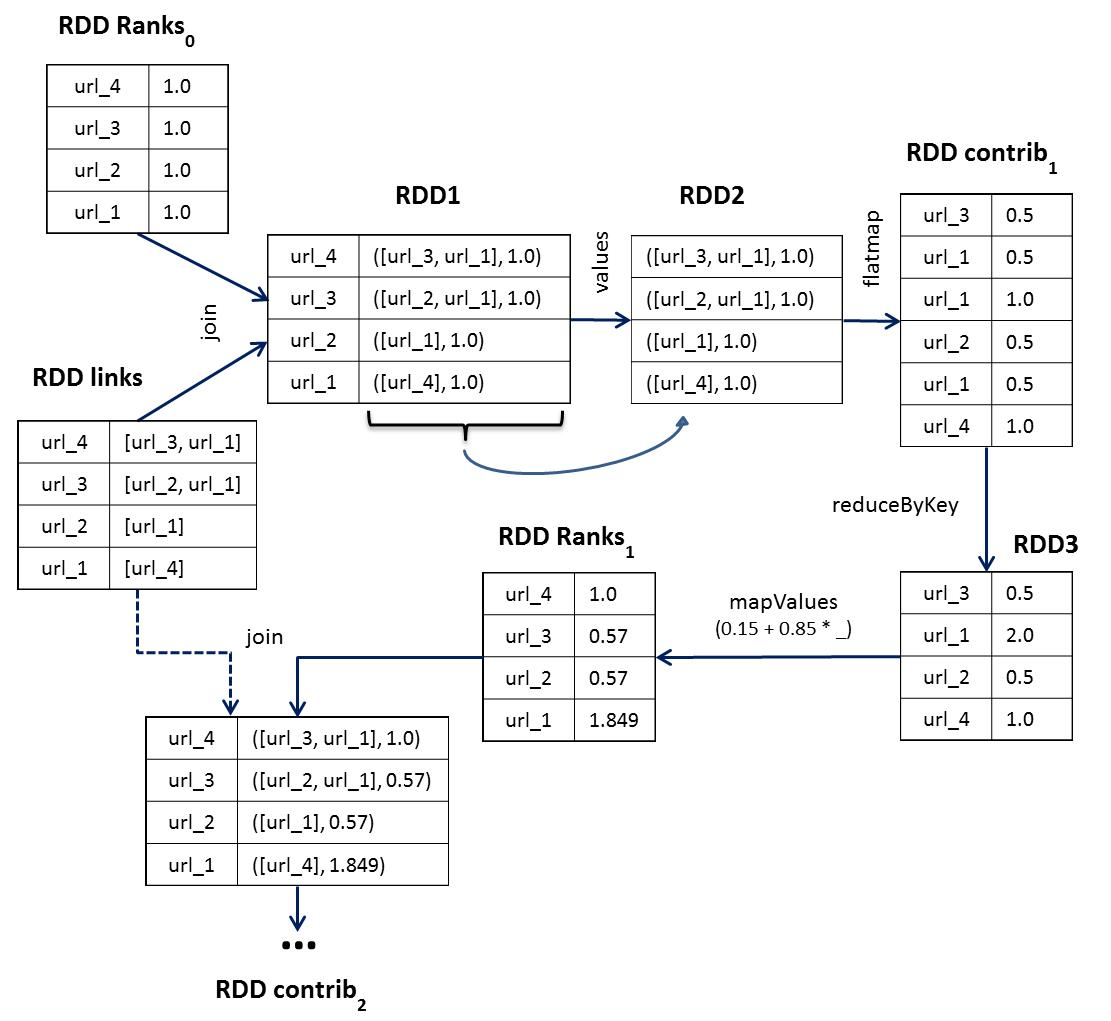

In [0]:
# imports for program
import sys
import re
import itertools
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession

In [0]:
# initialize spark configuration
conf = SparkConf()

In [0]:
# initialize spark context
sc = SparkContext(conf=conf)

In [0]:
lines = sc.textFile("sample.csv")

In [0]:
# check the lines data
print(type(lines))
print(lines.take(1)[0])

# N = lines.count()
# For our example:
N = 93

<class 'pyspark.rdd.RDD'>
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


### b. Algorithm Implementation

In [0]:
def parse_data(l):

  row = l.split(',')
  row_id = int(row[0])
  row_data = row[1:]

  links = []
  for r, i in zip(row_data, range(1, len(row_data) + 1)):
    if int(r) == 1 and i != row_id:
      links.append(i)
  return row_id, links

In [0]:
links = lines.map(lambda l: parse_data(l)).cache()

In [0]:
print([x for x in links.take(6)])

[(1, [13, 25, 57, 81, 88]), (2, [6, 8, 18, 24, 27]), (3, [5, 24, 29, 30, 76]), (4, [24, 47, 59, 60, 74]), (5, [3, 12, 14, 30, 76]), (6, [2, 7, 24, 27, 82])]


In [0]:
ranks = links.map(lambda x: (x[0], 1.0))

In [0]:
print([x for x in ranks.take(4)])

[(1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0)]


This part is the heart of the PageRank algorithm. In each iteration, the contributions are calculated and the ranks are recalculated based on those contributions. The algorithm has 4 steps: 
  1. Start the algorithm with each page at rank 1 
  2. Calculate URL contribution: contrib = rank/size 
  3. Set each URL new rank = 0.15 + 0.85 x contrib 
  4. Iterate to step 2 with the new rank

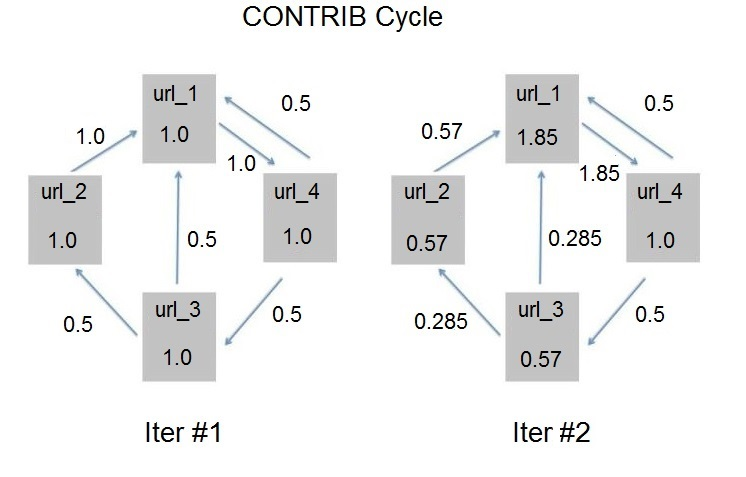

In this section we implement the algorithm with an iterative nature. 
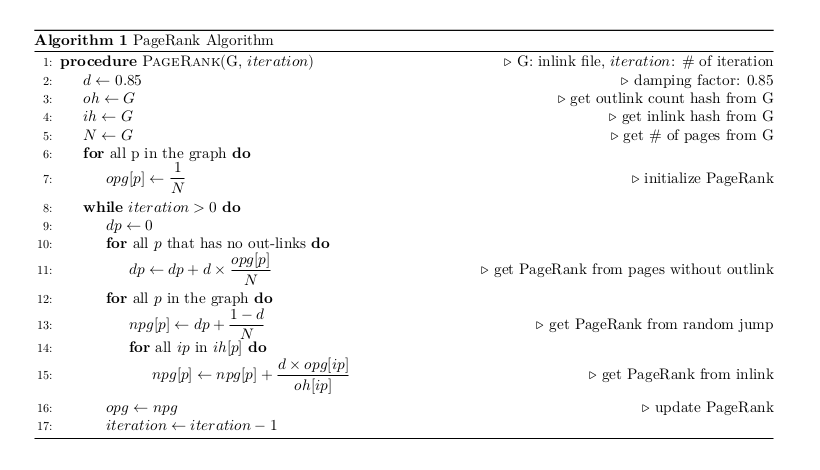

In [0]:
from operator import add

def computation(urls, rank):
    num_urls = len(urls)
    for url in urls:
        yield (url, rank / num_urls)

iter_num = 50

for iteration in range(iter_num):
  contribs = links.join(ranks).flatMap(
      lambda u: computation(u[1][0], u[1][1]))
  ranks = contribs.reduceByKey(add).mapValues(lambda rank: rank * 0.85 + 0.15)

At the end, we sort the output and print the result. Sorting could also be done using spark but as it wasn't mentioned in the text I randomly python sort to save some time.

In [0]:
# sorted_list = ranks.sortBy(lambda (a, b): b).collect()

def sortSecond(val): 
    return val[1]  
  
sorted_list = ranks.take(100)
sorted_list.sort(key = sortSecond, reverse=True)

for (link, rank) in sorted_list:
    print("%s has rank: %s." % (link, rank))

24 has rank: 0.9528813907951186.
27 has rank: 0.7555274990438057.
3 has rank: 0.7155556383504743.
76 has rank: 0.7111608310082443.
18 has rank: 0.6836428044550895.
30 has rank: 0.6509785801820772.
5 has rank: 0.5912053350858107.
9 has rank: 0.4751931589211109.
8 has rank: 0.4737306292055048.
13 has rank: 0.42990810021803494.
29 has rank: 0.4266240984559071.
6 has rank: 0.38543154240593563.
34 has rank: 0.3847177246080824.
53 has rank: 0.31198983661860075.
42 has rank: 0.30361858413050924.
72 has rank: 0.29561047390717354.
12 has rank: 0.2842188312930666.
14 has rank: 0.2842188312930666.
22 has rank: 0.26621927689790714.
51 has rank: 0.26574504981627145.
35 has rank: 0.26371921457044567.
16 has rank: 0.2606663587687564.
75 has rank: 0.23053420704196403.
54 has rank: 0.22555515806057763.
40 has rank: 0.2230843770885452.
63 has rank: 0.2230843770885452.
89 has rank: 0.2230843770885452.
2 has rank: 0.2155233622537312.
7 has rank: 0.2155233622537312.
82 has rank: 0.2155233622537312.
50 has 

In [0]:
sc.stop()